In [174]:
from sklearn.datasets import make_classification

In [176]:
import numpy as np

In [178]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [180]:
import matplotlib.pyplot as plt

In [182]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

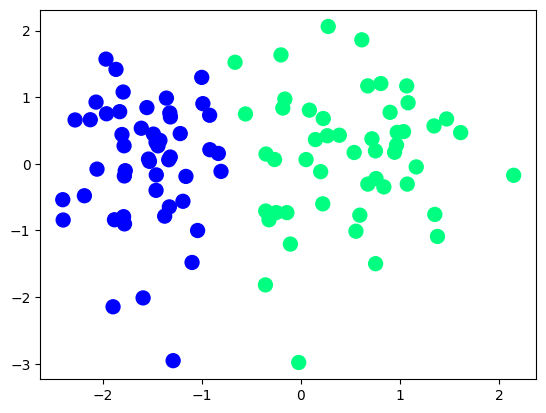

In [184]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [186]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [188]:
np.random.randint(0,100)

89

In [190]:
np.dot(np.insert(X[41],0,1),[1,1,1])

0.2946000908036749

In [192]:
def step(z):
    return 1 if z>0 else 0

In [194]:
step(0.294)

1

In [196]:
intercept_,coef_ = perceptron(X,y)

In [198]:
print(coef_)
print(intercept_)

[1.34443158 0.20909496]
0.9


In [200]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [202]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [204]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(-3.0, 2.0)

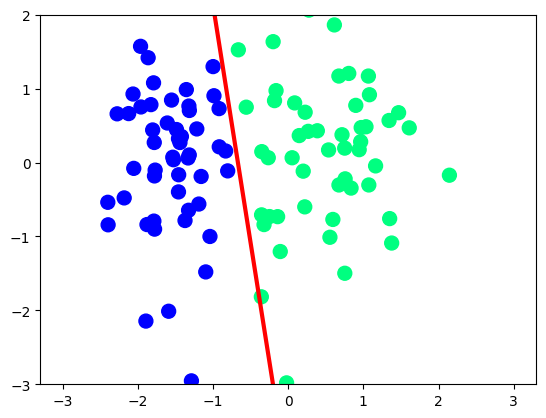

In [206]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Animation of same thing of above

In [210]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [212]:
m,b = perceptron(X,y)

In [236]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

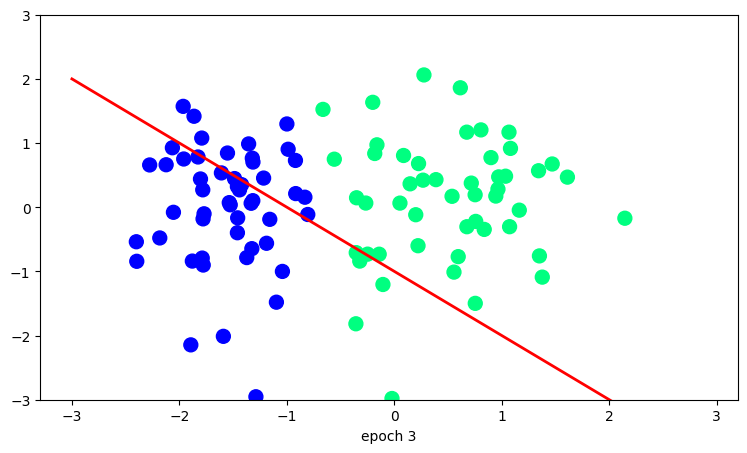

In [238]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 3)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    #return line, ax
    
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)